In [23]:
using Statistics, Plots, CSV, DataFrames

output_a = CSV.read("model_output_a.csv")
output_f = CSV.read("model_output_f.csv")
output_a.sinuosity_straight = fill(1.0, nrow(output_a))
output_f.sinuosity_straight = fill(1.0, nrow(output_f))

off_trail_num = [1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
off_trail_str = ["1", "1_5", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

NRMSE(pred, obs) = round(sqrt(mean((pred .- obs).^2))/(maximum(obs) - minimum(obs)), digits=2)
NMAE(pred, obs) = round(mean(abs.(pred .- obs))/(maximum(obs) - minimum(obs)), digits=2)

function create_df(df_a::DataFrame, df_f::DataFrame)
    nrmse_lcp_ap_a = [NRMSE(df_a["costs_lcp_" * k], df_a["costs_actual_" * k]) for k in off_trail_str]
    nrmse_str_ap_a = [NRMSE(df_a["costs_straight_" * k], df_a["costs_actual_" * k]) for k in off_trail_str]
    nrmse_ran_ap_a = [NRMSE(df_a["costs_random_" * k], df_a["costs_actual_" * k]) for k in off_trail_str]
    nrmse_lcp_ap_f = [NRMSE(df_f["costs_lcp_" * k], df_f["costs_actual_" * k]) for k in off_trail_str]
    nrmse_str_ap_f = [NRMSE(df_f["costs_straight_" * k], df_f["costs_actual_" * k]) for k in off_trail_str]
    nrmse_ran_ap_f = [NRMSE(df_f["costs_random_" * k], df_f["costs_actual_" * k]) for k in off_trail_str]
    nrmse_lcp_ap_cpm_a = [NRMSE(df_a["costs_per_m_lcp_" * k], df_a["costs_per_m_actual_" * k]) for k in off_trail_str]
    nrmse_str_ap_cpm_a = [NRMSE(df_a["costs_per_m_straight_" * k], df_a["costs_per_m_actual_" * k]) for k in off_trail_str]
    nrmse_ran_ap_cpm_a = [NRMSE(df_a["costs_per_m_random_" * k], df_a["costs_per_m_actual_" * k]) for k in off_trail_str]
    nrmse_lcp_ap_cpm_f = [NRMSE(df_f["costs_per_m_lcp_" * k], df_f["costs_per_m_actual_" * k]) for k in off_trail_str]
    nrmse_str_ap_cpm_f = [NRMSE(df_f["costs_per_m_straight_" * k], df_f["costs_per_m_actual_" * k]) for k in off_trail_str]
    nrmse_ran_ap_cpm_f = [NRMSE(df_f["costs_per_m_random_" * k], df_f["costs_per_m_actual_" * k]) for k in off_trail_str]
    nrmse_lcp_ap_sin_a = [NRMSE(df_a["sinuosity_lcp_" * k], df_a["sinuosity_actual"]) for k in off_trail_str]
    nrmse_str_ap_sin_a = [NRMSE(df_a["sinuosity_straight"], df_a["sinuosity_actual"]) for k in off_trail_str]
    nrmse_ran_ap_sin_a = [NRMSE(df_a["sinuosity_random"], df_a["sinuosity_actual"]) for k in off_trail_str]
    nrmse_lcp_ap_sin_f = [NRMSE(df_f["sinuosity_lcp_" * k], df_f["sinuosity_actual"]) for k in off_trail_str]
    nrmse_str_ap_sin_f = [NRMSE(df_f["sinuosity_straight"], df_f["sinuosity_actual"]) for k in off_trail_str]
    nrmse_ran_ap_sin_f = [NRMSE(df_f["sinuosity_random"], df_f["sinuosity_actual"]) for k in off_trail_str]
    nmae_lcp_ap_a = [NMAE(df_a["costs_per_m_lcp_" * k], df_a["costs_per_m_actual_" * k]) for k in off_trail_str]
    nmae_str_ap_a = [NMAE(df_a["costs_per_m_straight_" * k], df_a["costs_per_m_actual_" * k]) for k in off_trail_str]
    nmae_ran_ap_a = [NMAE(df_a["costs_per_m_random_" * k], df_a["costs_per_m_actual_" * k]) for k in off_trail_str]
    nmae_lcp_ap_f = [NMAE(df_f["costs_per_m_lcp_" * k], df_f["costs_per_m_actual_" * k]) for k in off_trail_str]
    nmae_str_ap_f = [NMAE(df_f["costs_per_m_straight_" * k], df_f["costs_per_m_actual_" * k]) for k in off_trail_str]
    nmae_ran_ap_f = [NMAE(df_f["costs_per_m_random_" * k], df_f["costs_per_m_actual_" * k]) for k in off_trail_str]
    mean_sin_lcp_a = [mean(df_a["sinuosity_lcp_" * k]) for k in off_trail_str]
    mean_sin_ap_a = [mean(df_a["sinuosity_actual"]) for k in off_trail_str]
    mean_sin_ran_a = [mean(df_a["sinuosity_random"]) for k in off_trail_str]
    mean_sin_lcp_f = [mean(df_f["sinuosity_lcp_" * k]) for k in off_trail_str]
    mean_sin_ap_f = [mean(df_f["sinuosity_actual"]) for k in off_trail_str]
    mean_sin_ran_f = [mean(df_f["sinuosity_random"]) for k in off_trail_str]
    mean_len_lcp_a = [mean(df_a["distance_lcp_" * k]) for k in off_trail_str]
    mean_len_ap_a = [mean(df_a["distance_actual"]) for k in off_trail_str]
    mean_len_str_a = [mean(df_a["distance_straight"]) for k in off_trail_str]
    mean_len_ran_a = [mean(df_a["distance_random"]) for k in off_trail_str]
    mean_len_lcp_f = [mean(df_f["distance_lcp_" * k]) for k in off_trail_str]
    mean_len_ap_f = [mean(df_f["distance_actual"]) for k in off_trail_str]
    mean_len_ran_f = [mean(df_f["distance_random"]) for k in off_trail_str]
    mean_len_str_f = [mean(df_f["distance_straight"]) for k in off_trail_str]
    mean_npdi_lcp_a = [mean(df_a["npdi_actual_lcp_" * k]) for k in off_trail_str]
    mean_npdi_str_a = [mean(df_a["npdi_actual_straight"]) for k in off_trail_str]
    mean_npdi_ran_a = [mean(df_a["npdi_actual_random"]) for k in off_trail_str]
    mean_npdi_lcp_f = [mean(df_f["npdi_actual_lcp_" * k]) for k in off_trail_str]
    mean_npdi_str_f = [mean(df_f["npdi_actual_straight"]) for k in off_trail_str]
    mean_npdi_ran_f = [mean(df_f["npdi_actual_random"]) for k in off_trail_str]

    return DataFrame(:off_trail_r => off_trail_num, :nrmse_lcp_ap_a => nrmse_lcp_ap_a, 
        :nrmse_str_ap_a => nrmse_str_ap_a, :nrmse_ran_ap_a => nrmse_ran_ap_a, :nrmse_lcp_ap_f => nrmse_lcp_ap_f, 
        :nrmse_str_ap_f => nrmse_str_ap_f, :nrmse_ran_ap_f => nrmse_ran_ap_f, :nrmse_lcp_ap_cpm_a => nrmse_lcp_ap_cpm_a, 
        :nrmse_str_ap_cpm_a => nrmse_str_ap_cpm_a, :nrmse_ran_ap_cpm_a => nrmse_ran_ap_cpm_a, 
        :nrmse_lcp_ap_cpm_f => nrmse_lcp_ap_cpm_f, :nrmse_str_ap_cpm_f => nrmse_str_ap_cpm_f, 
        :nrmse_ran_ap_cpm_f => nrmse_ran_ap_cpm_f, :nrmse_lcp_ap_sin_a => nrmse_lcp_ap_sin_a,
        :nrmse_str_ap_sin_a => nrmse_str_ap_sin_a, :nrmse_ran_ap_sin_a => nrmse_ran_ap_sin_a, 
        :nrmse_lcp_ap_sin_f => nrmse_lcp_ap_sin_f, :nrmse_str_ap_sin_f => nrmse_str_ap_sin_f, 
        :nrmse_ran_ap_sin_f => nrmse_ran_ap_sin_f, :nmae_lcp_ap_a => nmae_lcp_ap_a, 
        :nmae_str_ap_a => nmae_str_ap_a, :nmae_ran_ap_a => nmae_ran_ap_a, :nmae_lcp_ap_f => nmae_lcp_ap_f, 
        :nmae_str_ap_f => nmae_str_ap_f, :nmae_ran_ap_f => nmae_ran_ap_f, :mean_sin_lcp_a => mean_sin_lcp_a, 
        :mean_sin_ap_a => mean_sin_ap_a, :mean_sin_ran_a => mean_sin_ran_a, :mean_sin_lcp_f => mean_sin_lcp_f, 
        :mean_sin_ap_f => mean_sin_ap_f, :mean_sin_ran_f => mean_sin_ran_f, :mean_len_lcp_a => mean_len_lcp_a,
        :mean_len_ap_a => mean_len_ap_a, :mean_len_ran_a => mean_len_ran_a, :mean_len_lcp_f => mean_len_lcp_f, 
        :mean_len_ap_f => mean_len_ap_f, :mean_len_ran_f => mean_len_ran_f, :mean_len_str_a => mean_len_str_a, 
        :mean_len_str_f => mean_len_str_f, :mean_npdi_lcp_a => mean_npdi_lcp_a, :mean_npdi_str_a => mean_npdi_str_a,
        :mean_npdi_ran_a => mean_npdi_ran_a, :mean_npdi_lcp_f => mean_npdi_lcp_f, :mean_npdi_str_f => mean_npdi_str_f,
        :mean_npdi_ran_f => mean_npdi_ran_f)
end

analysis_df = create_df(output_a, output_f)
analysis_df_1000 = create_df(output_a[output_a.distance_straight .> 1000, :], output_f[output_f.distance_straight .> 1000, :])
CSV.write("analysis.csv", analysis_df)
CSV.write("analysis_1000.csv", analysis_df_1000)

"analysis_1000.csv"

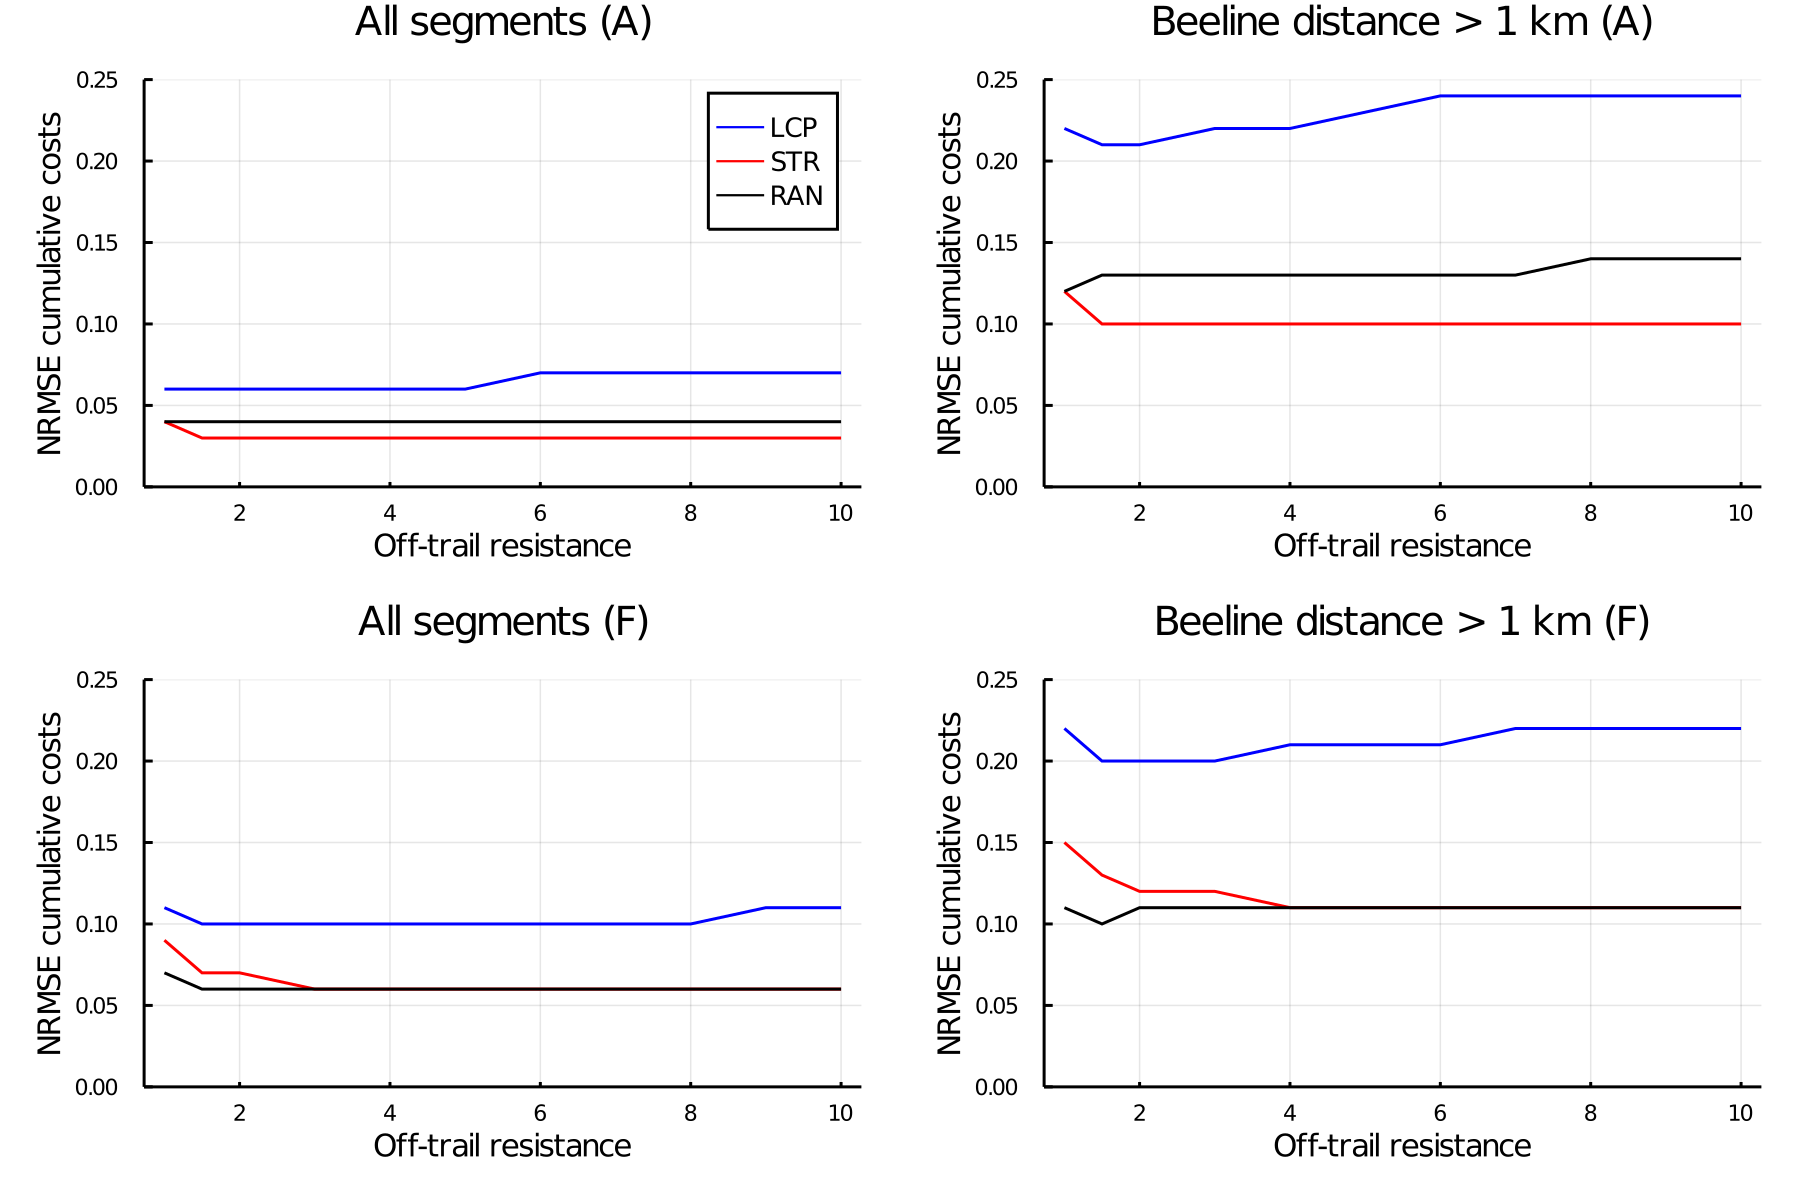

In [24]:
using Plots, StatsPlots, Plots.PlotMeasures

p1 = @df analysis_df plot(:off_trail_r, [:nrmse_lcp_ap_a :nrmse_str_ap_a :nrmse_ran_ap_a],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE cumulative costs",
    ylims = (0,0.25),
    linecolor = [:blue :red :black],
    label = ["LCP" "STR" "RAN"],
    title = "All segments (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p2 = @df analysis_df_1000 plot(:off_trail_r, [:nrmse_lcp_ap_a :nrmse_str_ap_a :nrmse_ran_ap_a],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE cumulative costs",
    ylims = (0,0.25),
    linecolor = [:blue :red :black],
    #label = ["LCP-AP (a)" "LCP-AP (f)" "STR-AP (a)" "STR-AP (f)" "RAN-AP (a)" "RAN-AP (f)"],
    legend = :none,
    title = "Beeline distance > 1 km (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)
    
p3 = @df analysis_df plot(:off_trail_r, [:nrmse_lcp_ap_f :nrmse_str_ap_f :nrmse_ran_ap_f],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE cumulative costs",
    ylims = (0,0.25),
    linecolor = [:blue :red :black],
    #abel = ["LCP" "STR" "RAN"],
    legend = :none,
    title = "All segments (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p4 = @df analysis_df_1000 plot(:off_trail_r, [:nrmse_lcp_ap_f :nrmse_str_ap_f :nrmse_ran_ap_f],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE cumulative costs",
    ylims = (0,0.25),
    linecolor = [:blue :red :black],
    #label = ["LCP-AP (a)" "LCP-AP (f)" "STR-AP (a)" "STR-AP (f)" "RAN-AP (a)" "RAN-AP (f)"],
    legend = :none,
    title = "Beeline distance > 1 km (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

plot(p1, p2, p3, p4, layout = (2, 2), dpi=300) |> display
savefig("plot_nrmse_costs.png")

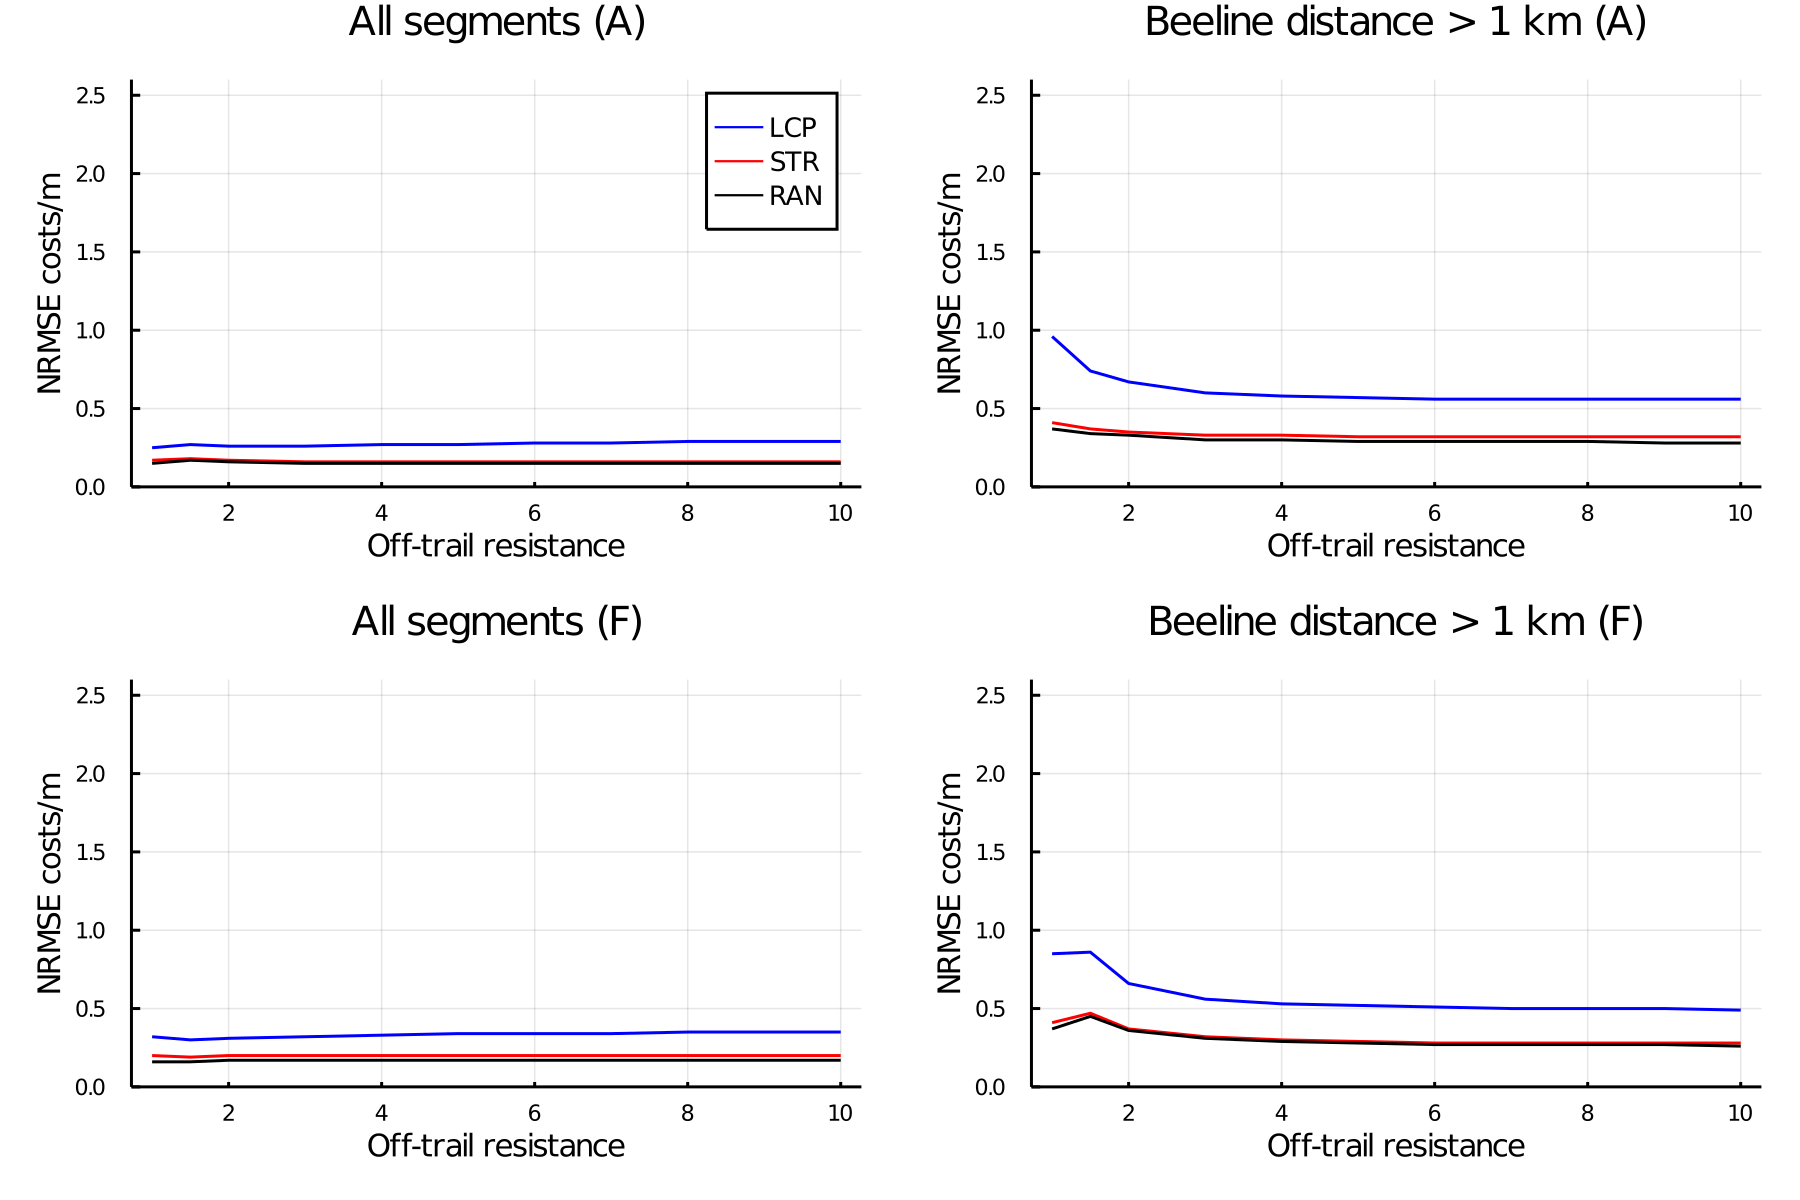

In [25]:
using Plots, StatsPlots, Plots.PlotMeasures

p1 = @df analysis_df plot(:off_trail_r, [:nrmse_lcp_ap_cpm_a :nrmse_str_ap_cpm_a :nrmse_ran_ap_cpm_a],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE costs/m",
    ylims = (0,2.6),
    linecolor = [:blue :red :black],
    label = ["LCP" "STR" "RAN"],
    title = "All segments (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p2 = @df analysis_df_1000 plot(:off_trail_r, [:nrmse_lcp_ap_cpm_a :nrmse_str_ap_cpm_a :nrmse_ran_ap_cpm_a],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE costs/m",
    ylims = (0,2.6),
    linecolor = [:blue :red :black],
    #label = ["LCP-AP (a)" "LCP-AP (f)" "STR-AP (a)" "STR-AP (f)" "RAN-AP (a)" "RAN-AP (f)"],
    legend = :none,
    title = "Beeline distance > 1 km (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)
    
p3 = @df analysis_df plot(:off_trail_r, [:nrmse_lcp_ap_cpm_f :nrmse_str_ap_cpm_f :nrmse_ran_ap_cpm_f],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE costs/m",
    ylims = (0,2.6),
    linecolor = [:blue :red :black],
    #abel = ["LCP" "STR" "RAN"],
    legend = :none,
    title = "All segments (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p4 = @df analysis_df_1000 plot(:off_trail_r, [:nrmse_lcp_ap_cpm_f :nrmse_str_ap_cpm_f :nrmse_ran_ap_cpm_f],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE costs/m",
    ylims = (0,2.6),
    linecolor = [:blue :red :black],
    #label = ["LCP-AP (a)" "LCP-AP (f)" "STR-AP (a)" "STR-AP (f)" "RAN-AP (a)" "RAN-AP (f)"],
    legend = :none,
    title = "Beeline distance > 1 km (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

plot(p1, p2, p3, p4, layout = (2, 2), dpi=300) |> display
savefig("plot_nrmse_cpm.png")

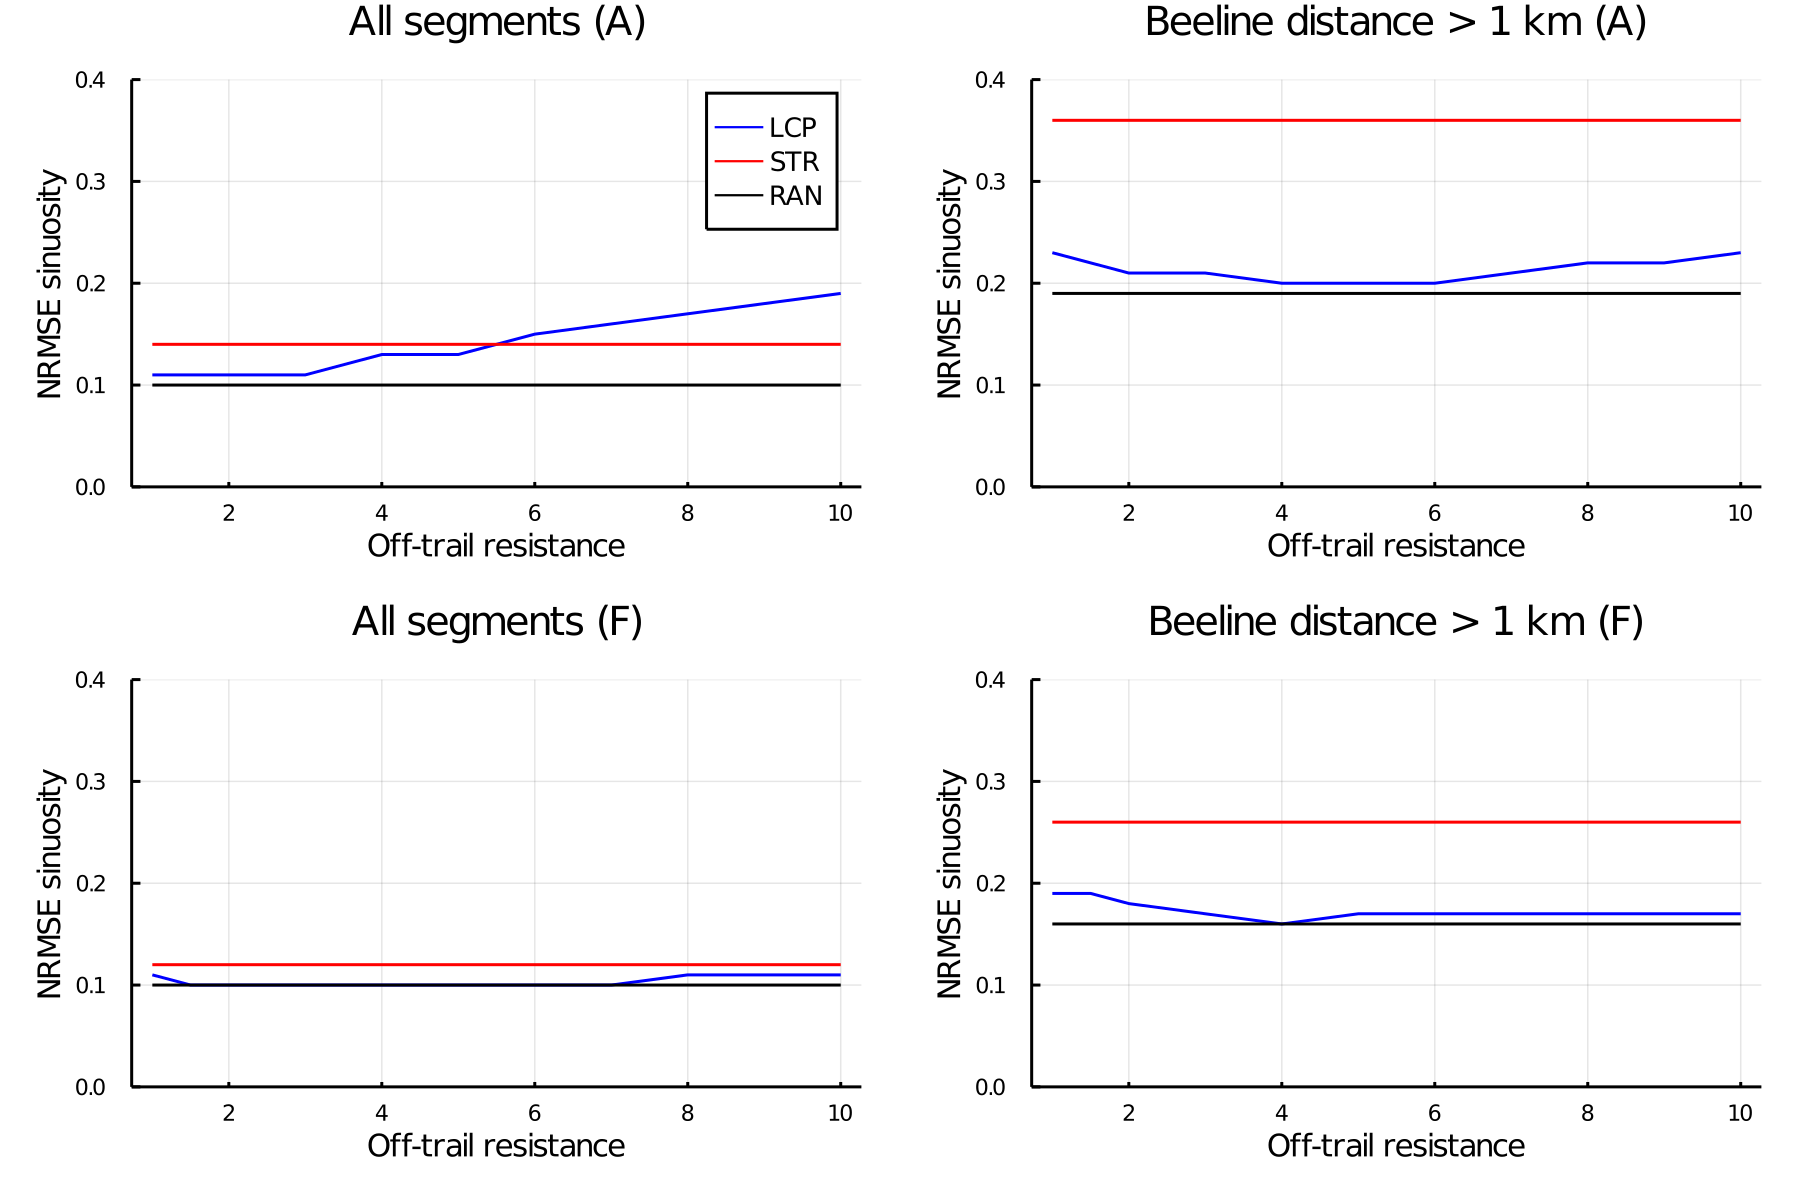

In [26]:
p1 = @df analysis_df plot(:off_trail_r, [:nrmse_lcp_ap_sin_a :nrmse_str_ap_sin_a :nrmse_ran_ap_sin_a],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE sinuosity",
    ylims = (0,0.4),
    linecolor = [:blue :red :black],
    label = ["LCP" "STR" "RAN"],
    title = "All segments (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p2 = @df analysis_df_1000 plot(:off_trail_r, [:nrmse_lcp_ap_sin_a :nrmse_str_ap_sin_a :nrmse_ran_ap_sin_a],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE sinuosity",
    ylims = (0,0.4),
    linecolor = [:blue :red :black],
    #label = ["LCP-AP (a)" "LCP-AP (f)" "STR-AP (a)" "STR-AP (f)" "RAN-AP (a)" "RAN-AP (f)"],
    legend = :none,
    title = "Beeline distance > 1 km (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)
    
p3 = @df analysis_df plot(:off_trail_r, [:nrmse_lcp_ap_sin_f :nrmse_str_ap_sin_f :nrmse_ran_ap_sin_f],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE sinuosity",
    ylims = (0,0.4),
    linecolor = [:blue :red :black],
    #abel = ["LCP" "STR" "RAN"],
    legend = :none,
    title = "All segments (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p4 = @df analysis_df_1000 plot(:off_trail_r, [:nrmse_lcp_ap_sin_f :nrmse_str_ap_sin_f :nrmse_ran_ap_sin_f],
    xlabel = "Off-trail resistance",
    ylabel = "NRMSE sinuosity",
    ylims = (0,0.4),
    linecolor = [:blue :red :black],
    #label = ["LCP-AP (a)" "LCP-AP (f)" "STR-AP (a)" "STR-AP (f)" "RAN-AP (a)" "RAN-AP (f)"],
    legend = :none,
    title = "Beeline distance > 1 km (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

plot(p1, p2, p3, p4, layout = (2, 2), dpi=300) |> display
savefig("plot_nrmse_sin.png")

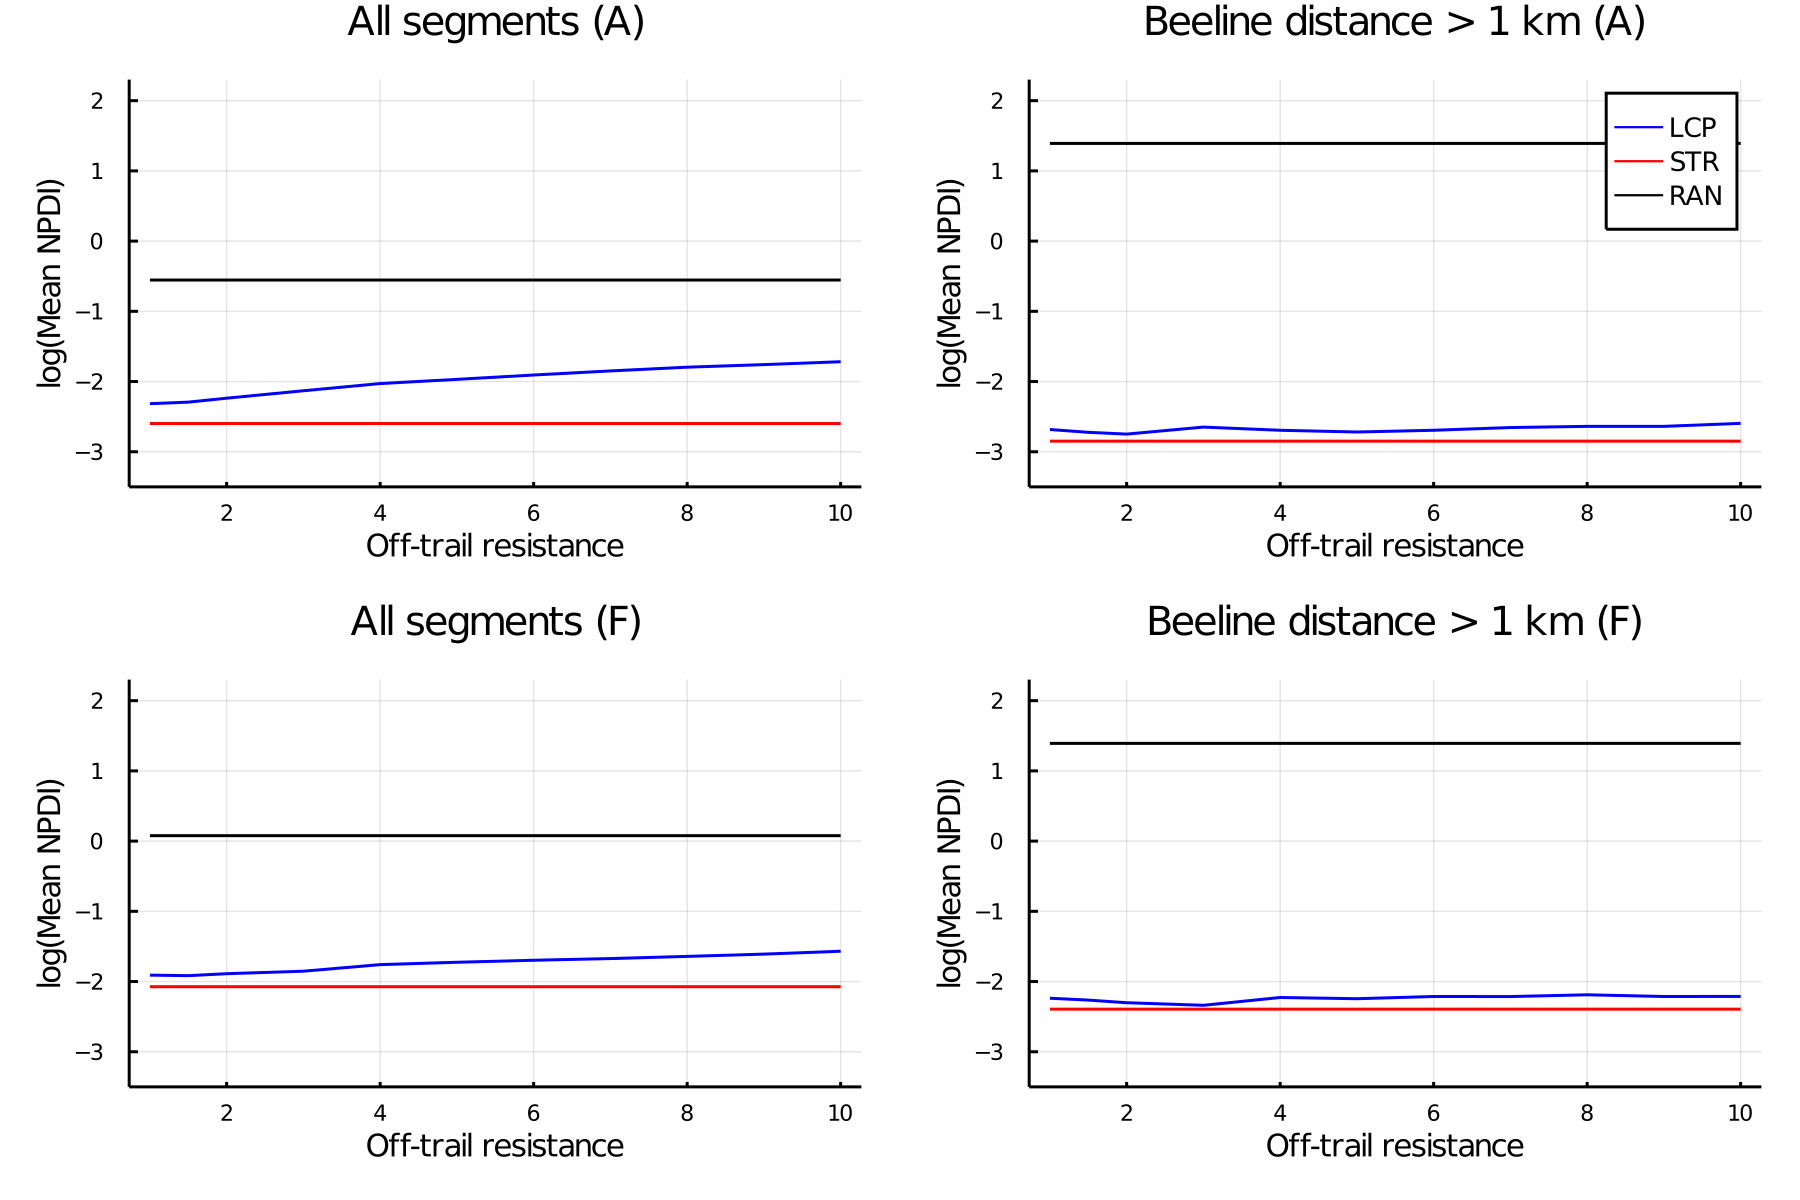

In [27]:
p1 = @df analysis_df plot(:off_trail_r, [log.(:mean_npdi_lcp_a) log.(:mean_npdi_str_a) log.(:mean_npdi_ran_a)],
    xlabel = "Off-trail resistance",
    ylabel = "log(Mean NPDI)",
    ylims = (-3.5,2.3),
    linecolor = [:blue :red :black],
    #label = ["Mean NPDI (a)" "Mean NPDI (f)"],
    legend = :none,
    title = "All segments (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p2 = @df analysis_df_1000 plot(:off_trail_r, [log.(:mean_npdi_lcp_a) log.(:mean_npdi_str_a) log.(:mean_npdi_ran_a)],
    xlabel = "Off-trail resistance",
    ylabel = "log(Mean NPDI)",
    ylims = (-3.5,2.3),
    linecolor = [:blue :red :black],
    label = ["LCP" "STR" "RAN"],
    #legend = :none,
    title = "Beeline distance > 1 km (A)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)


p3 = @df analysis_df plot(:off_trail_r, [log.(:mean_npdi_lcp_f) log.(:mean_npdi_str_f) log.(:mean_npdi_ran_f)],
    xlabel = "Off-trail resistance",
    ylabel = "log(Mean NPDI)",
    ylims = (-3.5,2.3),
    linecolor = [:blue :red :black],
    #label = ["Mean NPDI (a)" "Mean NPDI (f)"],
    legend = :none,
    title = "All segments (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

p4 = @df analysis_df_1000 plot(:off_trail_r, [log.(:mean_npdi_lcp_f) log.(:mean_npdi_str_f) log.(:mean_npdi_ran_f)],
    xlabel = "Off-trail resistance",
    ylabel = "log(Mean NPDI)",
    ylims = (-3.5,2.3),
    linecolor = [:blue :red :black],
    #label = ["LCP-AP (a)" "LCP-AP (f)" "STR-AP (a)" "STR-AP (f)"],
    legend = :none,
    title = "Beeline distance > 1 km (F)",
    titlefontsize = 9,
    labelfontsize = 7,
    legendfontsize = 6,
    xtickfontsize=5,
    ytickfontsize=5,
    margin = 5px)

plot(p1, p2, p3, p4, layout = (2, 2), dpi=300) |> display
savefig("plot_npdi.png")

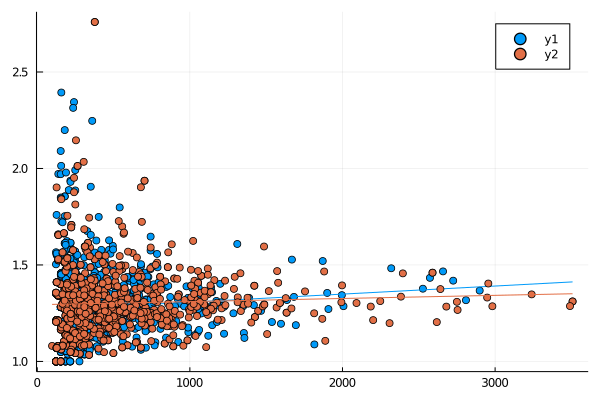

In [28]:
p = scatter(output_a.distance_straight, output_a.sinuosity_lcp_2, smooth = true)
plot!(output_f.distance_straight, output_f.sinuosity_lcp_2, seriestype = :scatter, smooth = true)

In [29]:
#diff_nrmse = analysis_df.nrmse_lcp_ap_a .- :nrmse_str_ap_a :nrmse_lcp_ap_f  :nrmse_str_ap_f
# nrmse difference between str-ap and lcp-ap in abhängigkeit von segment length